# Used Bike Prices - Feature Engineering and Exploratory Data Analysis (EDA)
## Author: Kiran Sumit Dalmiya

This notebook presents a complete data science workflow for predicting used bike prices using feature engineering, exploratory data analysis, and machine learning modeling on the provided dataset. 
The project highlights data cleaning, handling missing values, and advanced visualizations to uncover insights.


## Step 1 : Load and Preview Data

Load the `bikes.csv` dataset and inspect its structure including missing values and data types.


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')


In [78]:
# Load the dataset


# Load the dataset (update the path if needed)
File_Path = r"C:\ML and AI\Unified Mentor Pvt. Ltd\Assigment 4 Used Bike Prices\bikes.csv"
df = pd.read_csv(File_Path)

# Display the first few rows
df.head()


,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


## Step 2: Data Cleaning and Preprocessing

- Handle missing values in columns like `mileage`, `power`, and `location`.
- Extract numerical data from mixed text fields.
- Correct inconsistent categorical naming.
- Convert data types appropriately.


In [79]:
df.shape

(7857, 8)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [81]:
df.describe()

,model_year,price
count,7857.000000,7.857000e+03
mean,2015.367698,1.067913e+05
std,4.001443,1.389261e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


In [82]:
# Check data types and missing values
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB
None

Missing values per column:
model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64


In [83]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


In [84]:
# Extract numerical cc from modelname using regex
def extract_cc(name):
    match = re.search(r'(\d{2,4})\s?cc', name.lower())
    if match:
        return int(match.group(1))
    else:
        return np.nan

df['cc'] = df['model_name'].apply(extract_cc)

In [85]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,NaN
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350.0
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,NaN
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,NaN
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330.0
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000,150.0
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000,100.0
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740,180.0
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000,150.0


In [86]:
# Fix known inconsistent brand/model names
df['model_name'] = df['model_name'].str.replace('BenelliImperiale', 'Benelli Imperiale', regex=False)


In [87]:
# Extract brand as first word from modelname
df['brand'] = df['model_name'].apply(lambda x: x.split()[0])

In [88]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,NaN,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350.0,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,NaN,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,NaN,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330.0,Jawa
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000,150.0,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000,100.0,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740,180.0,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000,150.0,Bajaj


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  7857 non-null   object 
 1   model_year  7857 non-null   int64  
 2   kms_driven  7857 non-null   object 
 3   owner       7857 non-null   object 
 4   location    7838 non-null   object 
 5   mileage     7846 non-null   object 
 6   power       7826 non-null   object 
 7   price       7857 non-null   int64  
 8   cc          5761 non-null   float64
 9   brand       7857 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 614.0+ KB


In [90]:
df.mileage.unique()

array(['\n\n 35 kmpl', '\n\n 30 kmpl', '\n\n 28 Kms', '\n\n ',
       '\n\n 65 kmpl', '\n\n 40 Kmpl', '\n\n 25 kmpl', '\n\n 58 Kmpl',
       '\n\n 32 kmpl', '\n\n 40 kmpl', '\n\n 65 Kmpl', '\n\n 30 Kmpl',
       '\n\n 42 Kmpl', '\n\n 37 Kmpl', '\n\n 37 kmpl', '\n\n 60 Kmpl',
       '\n\n 53 kmpl', '\n\n 55 kmpl', '\n\n 45 kmpl', '\n\n 38 kmpl',
       '\n\n 45-55', '\n\n 29 kmpl', '\n\n 75 kmpl', '\n\n 63kmpl',
       '\n\n 31.85 kmpl', '\n\n 45-55 kmpl', '\n\n 5 kmpl',
       '\n\n 50 kmpl', '\n\n 45 Kmpl', '\n\n 35 Kmpl', '\n\n 22 kmpl',
       '\n\n 26 kmpl', '\n\n 42 kmpl', '\n\n 104 Kmpl', '\n\n 39.4 kmpl',
       '\n\n 89 kmpl', '\n\n 52 Kmpl', '\n\n 80 Kmpl', '\n\n 84 Kmpl',
       '\n\n 43 kmpl', nan, '\n\n 55-60 Kmpl', '\n\n Liquid Cooled',
       '\n\n 65kmpl', '\n\n 95 kmpl', '\n\n 53.72 kmpl', '\n\n 26kmpl',
       '\n\n 45.8 kmpl', '\n\n 48 kmpl', '\n\n 52 kmpl', '\n\n 57 kmpl',
       '\n\n  60 kmpl', '\n\n 67 kmpl', '\n\n 81 kmpl', '\n\n 55 Kmpl',
       '\n\n 60 kmpl', 

In [91]:
# Clean 'mileage' column (replace NaNs, convert to float)
df['mileage'] = (
    df['mileage']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)  # keep only digits and dot
    .replace('', np.nan)                      # replace empty strings with NaN
    .astype(float)                            # convert to float
)


In [92]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19 bhp,63500,NaN,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.80 bhp,115000,350.0,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28 bhp,300000,NaN,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.50 bhp,100000,NaN,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,NaN,30 bhp,197500,330.0,Jawa
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,42.0,16 bhp,55000,150.0,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,80.0,7.7,28000,100.0,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,65.0,17 bhp,61740,180.0,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,57.0,11.80 bhp,49000,150.0,Bajaj


In [93]:
# Clean 'power' column (remove units, convert to float, fix unit conversion)
def clean_power(x):
    if pd.isna(x):
        return np.nan
    x = str(x).lower().replace('bhp', '').replace('ps', '').replace('kw', '').strip()
    try:
        val = float(x)
        # If originally in kw, convert to bhp approx (1 kw = 1.341 bhp)
        if 'kw' in str(x):
            val *= 1.341
        return val
    except:
        return np.nan

df['power'] = df['power'].apply(clean_power)
df['power'].fillna(df.groupby('brand')['power'].transform('mean'), inplace=True)


C:\Users\dalmi\AppData\Local\Temp\ipykernel_34488\1766221655.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['power'].fillna(df.groupby('brand')['power'].transform('mean'), inplace=True)


In [94]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19.0,63500,NaN,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.8,115000,350.0,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28.0,300000,NaN,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.5,100000,NaN,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,NaN,30.0,197500,330.0,Jawa
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,42.0,16.0,55000,150.0,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,80.0,7.7,28000,100.0,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,65.0,17.0,61740,180.0,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,57.0,11.8,49000,150.0,Bajaj


## Step 3: Exploratory Data Analysis (EDA)

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

### Univariate Analysis

#### 🔹 1. Histograms for Continuous Numerical Variables

(Price, Mileage, Power, Kms Driven)

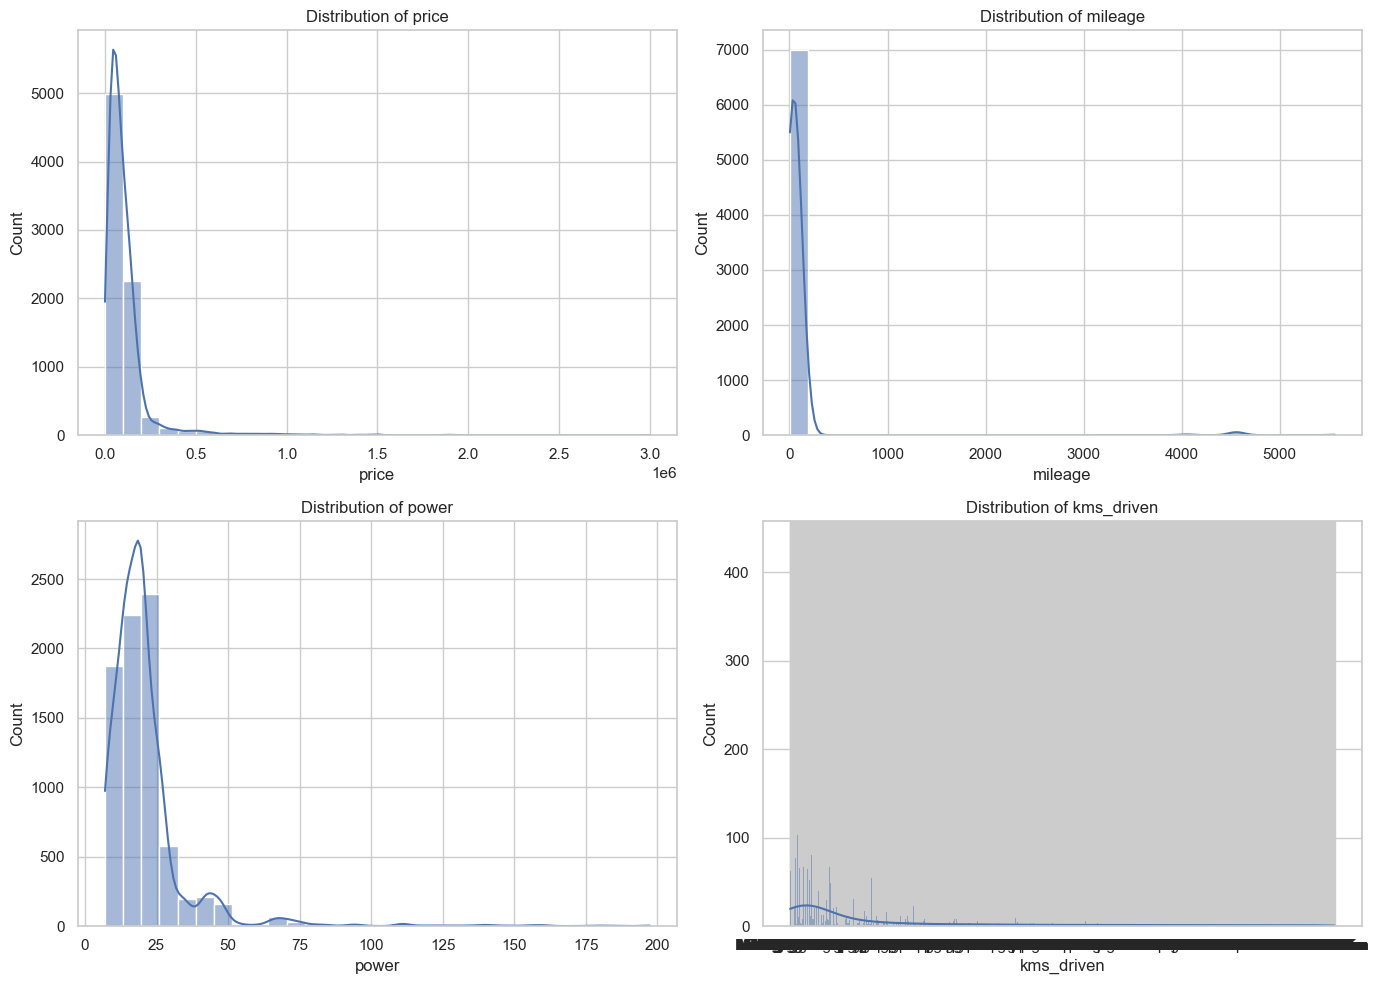

In [96]:
num_cols = ['price', 'mileage', 'power', 'kms_driven']

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


#### 🔹 2. Distribution of Model Year (Categorical Numerical)

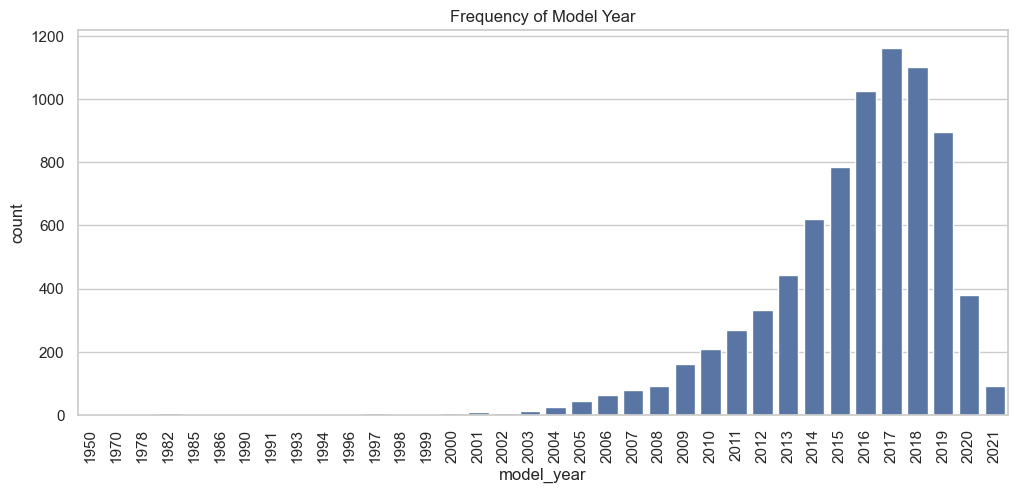

In [97]:
plt.figure(figsize=(12,5))
sns.countplot(x='model_year', data=df)
plt.title("Frequency of Model Year")
plt.xticks(rotation=90)
plt.show()


#### 🔹 3. Frequency Distribution of Owner Category

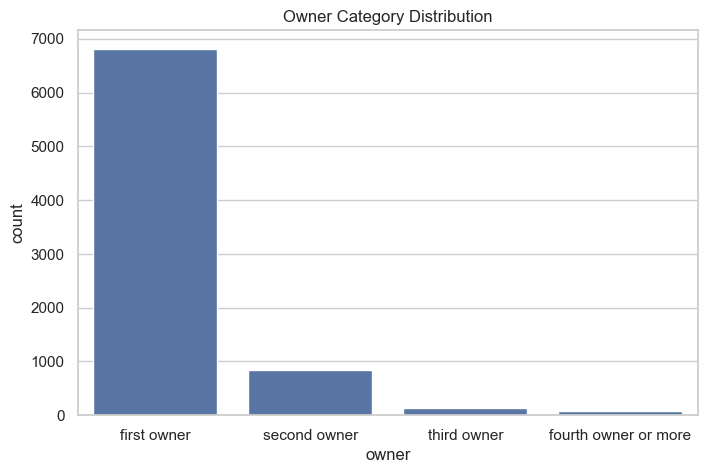

In [98]:
plt.figure(figsize=(8,5))
sns.countplot(x='owner', data=df, order=df['owner'].value_counts().index)
plt.title("Owner Category Distribution")
plt.show()


#### 🔹 4. Frequency Distribution of Brand

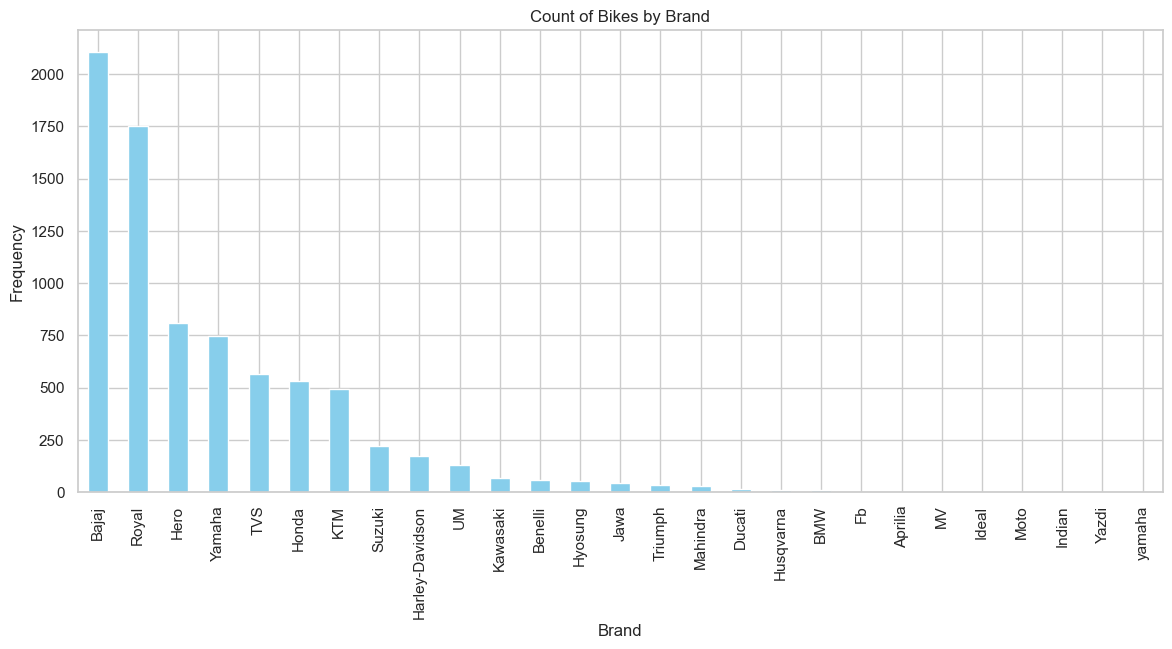

In [99]:
plt.figure(figsize=(14,6))
df['brand'].value_counts().sort_values(ascending=False).plot(
    kind='bar', color='skyblue')
plt.title("Count of Bikes by Brand")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.show()


#### 🔹 5. Summary of Categorical Variables

In [100]:
cat_cols = ['owner', 'location', 'brand']
for col in cat_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts().head(10))



Value Counts for owner:
owner
first owner             6817
second owner             833
third owner              134
fourth owner or more      73
Name: count, dtype: int64

Value Counts for location:
location
delhi        1438
mumbai        857
bangalore     783
pune          343
hyderabad     337
chennai       322
gurgaon       311
jaipur        291
ahmedabad     235
faridabad     164
Name: count, dtype: int64

Value Counts for brand:
brand
Bajaj              2105
Royal              1750
Hero                808
Yamaha              747
TVS                 567
Honda               530
KTM                 491
Suzuki              223
Harley-Davidson     171
UM                  128
Name: count, dtype: int64


### Observations:
#### - Price, kms_driven and power are right-skewed (few very high values).
#### - Most bikes have mileage between 30–60 kmpl.
#### - Majority of bikes are from first owners.
#### - Bajaj, Royal Enfield, Yamaha, Hero are the top brands.
#### - Highest number of bike listings are from the year 2015–2018.


### Bivariate Analysis


#### 🔹 1. Price vs Model Year (Scatter Plot)

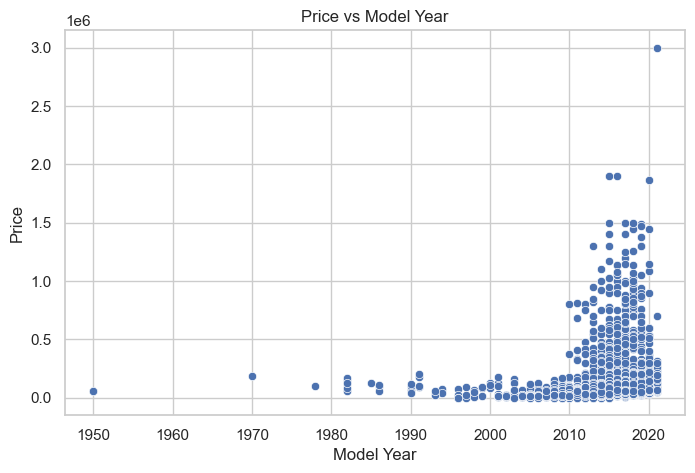

In [101]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='model_year', y='price')
plt.title("Price vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.show()


#### 🔹 2. Price vs Kms Driven

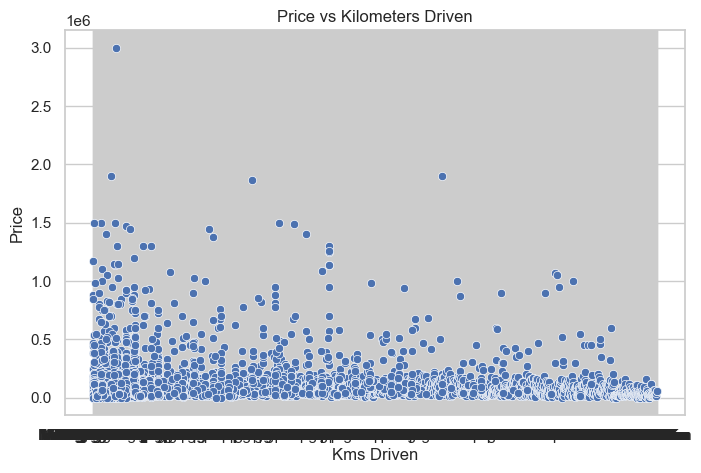

In [102]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='kms_driven', y='price')
plt.title("Price vs Kilometers Driven")
plt.xlabel("Kms Driven")
plt.ylabel("Price")
plt.show()


#### 🔹 3. Price vs Mileage

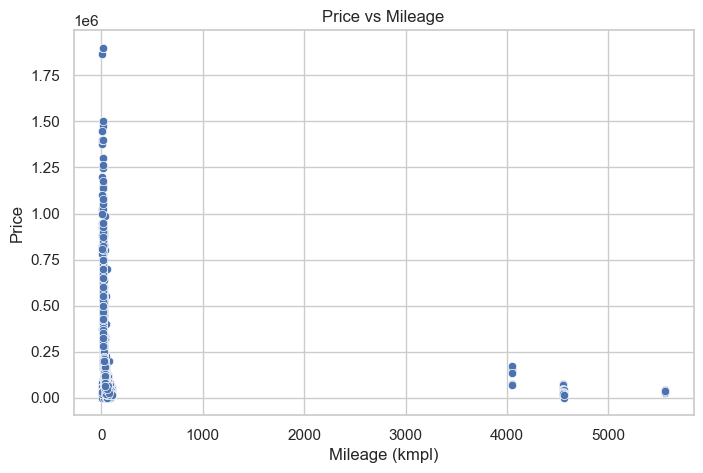

In [103]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='mileage', y='price')
plt.title("Price vs Mileage")
plt.xlabel("Mileage (kmpl)")
plt.ylabel("Price")
plt.show()


#### 🔹 4. Price vs Power

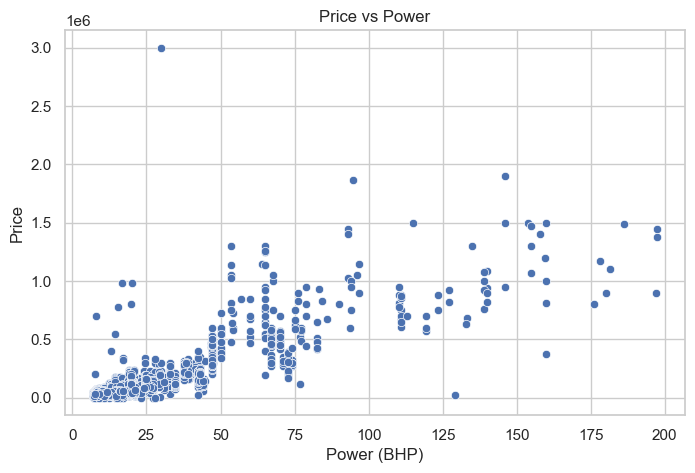

In [104]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='power', y='price')
plt.title("Price vs Power")
plt.xlabel("Power (BHP)")
plt.ylabel("Price")
plt.show()


#### 🔹 5. Price vs Brand (Boxplot)

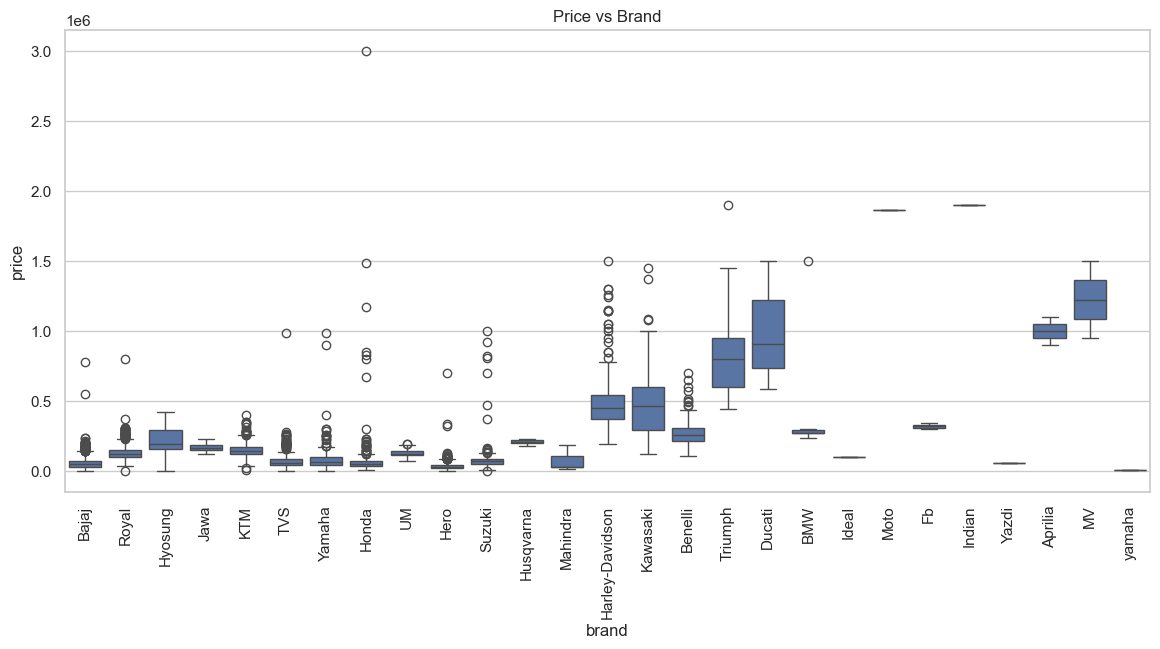

In [105]:
plt.figure(figsize=(14,6))
sns.boxplot(x='brand', y='price', data=df)
plt.title("Price vs Brand")
plt.xticks(rotation=90)
plt.show()


#### 🔹 6. Price vs Owner Type

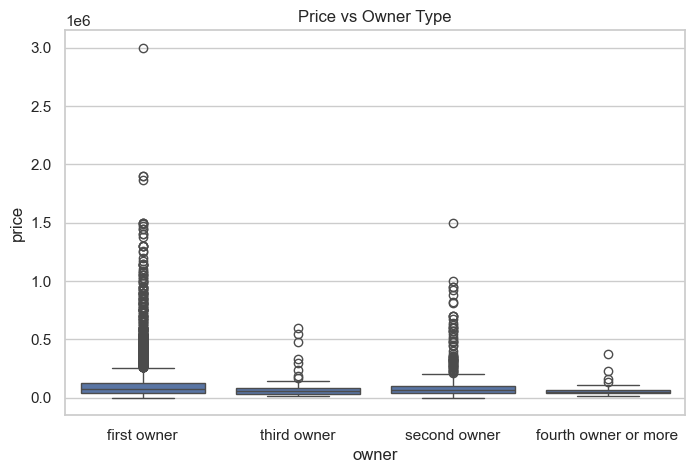

In [106]:
plt.figure(figsize=(8,5))
sns.boxplot(x='owner', y='price', data=df)
plt.title("Price vs Owner Type")
plt.show()


#### 7. Correlation Heatmap (Numerical Features Only)

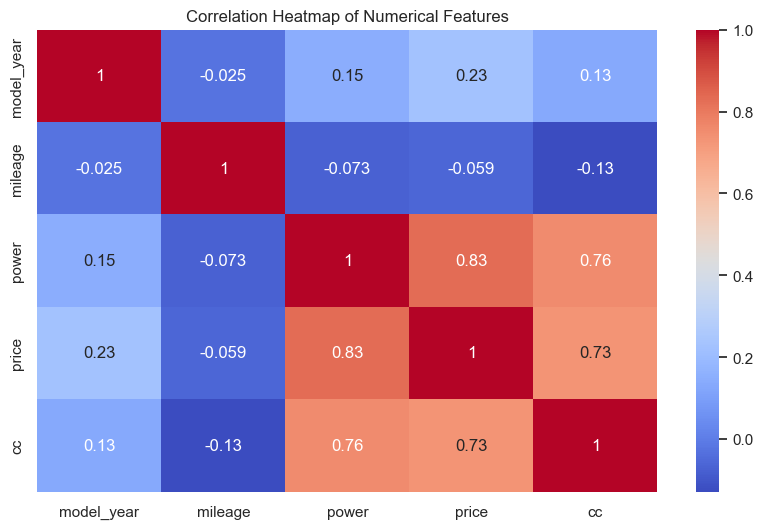

In [107]:



plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['int64', 'float64']).corr()   # Only numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


### 📌 Key Insights:
#### - Price is moderately positively correlated with power and cc.
#### - Strong negative correlation between price and kms_driven.
#### - Newer bikes (recent model_year) tend to have higher prices.
#### - First owner bikes are priced higher than second or third owner bikes.
#### - Premium brands like Harley-Davidson, BMW, and Ducati show higher resale price.


##  step 4. Feature Engineering 

#### - Creating New Features

A) Age of Bike

Calculated using current year (2024) minus model year.

In [108]:
df['bike_age'] = 2024 - df['model_year']


In [109]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand,bike_age
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19.0,63500,NaN,Bajaj,7
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.8,115000,350.0,Royal,8
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28.0,300000,NaN,Hyosung,12
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.5,100000,NaN,Bajaj,7
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,NaN,30.0,197500,330.0,Jawa,4
...,...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,42.0,16.0,55000,150.0,Yamaha,13
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,80.0,7.7,28000,100.0,Bajaj,9
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,65.0,17.0,61740,180.0,Bajaj,8
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,57.0,11.8,49000,150.0,Bajaj,8


B) Power-to-Weight Ratio

Since weight is not available, we approximate using cc (engine capacity).

Formula: Power / CC

In [110]:
df['power_to_cc_ratio'] = df['power'] / df['cc']


In [111]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand,bike_age,power_to_cc_ratio
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19.0,63500,NaN,Bajaj,7,NaN
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.8,115000,350.0,Royal,8,0.056571
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28.0,300000,NaN,Hyosung,12,NaN
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.5,100000,NaN,Bajaj,7,NaN
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,NaN,30.0,197500,330.0,Jawa,4,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,42.0,16.0,55000,150.0,Yamaha,13,0.106667
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,80.0,7.7,28000,100.0,Bajaj,9,0.077000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,65.0,17.0,61740,180.0,Bajaj,8,0.094444
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,57.0,11.8,49000,150.0,Bajaj,8,0.078667


#### Encoding Categorical Features (Owner, Brand)

- Here we’ll use One-Hot Encoding, which is the most appropriate for this project.

In [112]:
df = pd.get_dummies(df, columns=['owner', 'brand'], drop_first=True)


In [113]:
df[['model_year', 'bike_age', 'power', 'cc', 'power_to_cc_ratio']].head()


,model_year,bike_age,power,cc,power_to_cc_ratio
0,2017,7,19.0,NaN,NaN
1,2016,8,19.8,350.0,0.056571
2,2012,12,28.0,NaN,NaN
3,2017,7,34.5,NaN,NaN
4,2020,4,30.0,330.0,0.090909


In [114]:
df.head()


,model_name,model_year,kms_driven,location,mileage,power,price,cc,bike_age,power_to_cc_ratio,...,brand_Mahindra,brand_Moto,brand_Royal,brand_Suzuki,brand_TVS,brand_Triumph,brand_UM,brand_Yamaha,brand_Yazdi,brand_yamaha
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,hyderabad,35.0,19.0,63500,NaN,7,NaN,...,False,False,False,False,False,False,False,False,False,False
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,hyderabad,35.0,19.8,115000,350.0,8,0.056571,...,False,False,True,False,False,False,False,False,False,False
2,Hyosung GT250R 2012,2012,14795 Km,hyderabad,30.0,28.0,300000,NaN,12,NaN,...,False,False,False,False,False,False,False,False,False,False
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,pondicherry,28.0,34.5,100000,NaN,7,NaN,...,False,False,False,False,False,False,False,False,False,False
4,Jawa Perak 330cc 2020,2020,2000 Km,bangalore,NaN,30.0,197500,330.0,4,0.090909,...,False,False,False,False,False,False,False,False,False,False


###  Feature Engineering Summary:
#### - The age of the bike shows depreciation effect on resale price.
#### - Power-to-CC Ratio helps identify performance bikes.
#### - Location and Owner were converted into numeric format using One-Hot Encoding.
#### - These features will increase model accuracy and improve learning.


### Check data types and missing values before feature transformation 

In [115]:
df.dtypes.head(7)

model_name     object
model_year      int64
kms_driven     object
location       object
mileage       float64
power         float64
price           int64
dtype: object

In [119]:
df[['price', 'kms_driven', 'mileage', 'power', 'cc']].info()
print(df[['price', 'kms_driven', 'mileage', 'power', 'cc']].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7857 non-null   int64  
 1   kms_driven  7857 non-null   object 
 2   mileage     7083 non-null   float64
 3   power       7853 non-null   float64
 4   cc          5761 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 307.0+ KB
price            0
kms_driven       0
mileage        774
power            4
cc            2096
dtype: int64


In [121]:
df.head()

,model_name,model_year,kms_driven,location,mileage,power,price,cc,bike_age,power_to_cc_ratio,...,brand_Mahindra,brand_Moto,brand_Royal,brand_Suzuki,brand_TVS,brand_Triumph,brand_UM,brand_Yamaha,brand_Yazdi,brand_yamaha
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,hyderabad,35.0,19.0,63500,NaN,7,NaN,...,False,False,False,False,False,False,False,False,False,False
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,hyderabad,35.0,19.8,115000,350.0,8,0.056571,...,False,False,True,False,False,False,False,False,False,False
2,Hyosung GT250R 2012,2012,14795 Km,hyderabad,30.0,28.0,300000,NaN,12,NaN,...,False,False,False,False,False,False,False,False,False,False
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,pondicherry,28.0,34.5,100000,NaN,7,NaN,...,False,False,False,False,False,False,False,False,False,False
4,Jawa Perak 330cc 2020,2020,2000 Km,bangalore,NaN,30.0,197500,330.0,4,0.090909,...,False,False,False,False,False,False,False,False,False,False


In [123]:
# Clean kms_driven column
df['kms_driven'] = df['kms_driven'].str.extract(r'(\d+)').astype(float)


In [125]:
df[['price', 'kms_driven', 'mileage', 'power', 'cc']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7857 non-null   int64  
 1   kms_driven  7854 non-null   float64
 2   mileage     7083 non-null   float64
 3   power       7853 non-null   float64
 4   cc          5761 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 307.0 KB


In [126]:
df[['price', 'kms_driven', 'mileage', 'power', 'cc']].info()
print(df[['price', 'kms_driven', 'mileage', 'power', 'cc']].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7857 non-null   int64  
 1   kms_driven  7854 non-null   float64
 2   mileage     7083 non-null   float64
 3   power       7853 non-null   float64
 4   cc          5761 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 307.0 KB
price            0
kms_driven       3
mileage        774
power            4
cc            2096
dtype: int64


In [124]:
df.head()

,model_name,model_year,kms_driven,location,mileage,power,price,cc,bike_age,power_to_cc_ratio,...,brand_Mahindra,brand_Moto,brand_Royal,brand_Suzuki,brand_TVS,brand_Triumph,brand_UM,brand_Yamaha,brand_Yazdi,brand_yamaha
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,hyderabad,35.0,19.0,63500,NaN,7,NaN,...,False,False,False,False,False,False,False,False,False,False
1,Royal Enfield Classic 350cc 2016,2016,50000.0,hyderabad,35.0,19.8,115000,350.0,8,0.056571,...,False,False,True,False,False,False,False,False,False,False
2,Hyosung GT250R 2012,2012,14795.0,hyderabad,30.0,28.0,300000,NaN,12,NaN,...,False,False,False,False,False,False,False,False,False,False
3,Bajaj Dominar 400 ABS 2017,2017,28.0,pondicherry,28.0,34.5,100000,NaN,7,NaN,...,False,False,False,False,False,False,False,False,False,False
4,Jawa Perak 330cc 2020,2020,2000.0,bangalore,NaN,30.0,197500,330.0,4,0.090909,...,False,False,False,False,False,False,False,False,False,False


In [127]:
cols_to_scale = ['price', 'kms_driven', 'mileage', 'power', 'cc']

for col in cols_to_scale:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\dalmi\AppData\Local\Temp\ipykernel_34488\3125067734.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\dalmi\AppData\Local\Temp\ipykernel_34488\3125067734.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [128]:
df[['price', 'kms_driven', 'mileage', 'power', 'cc']].info()
print(df[['price', 'kms_driven', 'mileage', 'power', 'cc']].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7857 non-null   int64  
 1   kms_driven  7857 non-null   float64
 2   mileage     7857 non-null   float64
 3   power       7857 non-null   float64
 4   cc          7857 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 307.0 KB
price         0
kms_driven    0
mileage       0
power         0
cc            0
dtype: int64


### Feature Transformation

 #### Standardization (Scaling Numerical Features)

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['price', 'kms_driven', 'mileage', 'power', 'cc']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()


,model_name,model_year,kms_driven,location,mileage,power,price,cc,bike_age,power_to_cc_ratio,...,brand_Mahindra,brand_Moto,brand_Royal,brand_Suzuki,brand_TVS,brand_Triumph,brand_UM,brand_Yamaha,brand_Yazdi,brand_yamaha
0,Bajaj Avenger Cruise 220 2017,2017,-0.009916,hyderabad,-0.122434,-0.125325,-0.311634,-0.347932,7,NaN,...,False,False,False,False,False,False,False,False,False,False
1,Royal Enfield Classic 350cc 2016,2016,1.223491,hyderabad,-0.122434,-0.072028,0.059090,1.021930,8,0.056571,...,False,False,True,False,False,False,False,False,False,False
2,Hyosung GT250R 2012,2012,-0.092330,hyderabad,-0.133266,0.474269,1.390818,-0.347932,12,NaN,...,False,False,False,False,False,False,False,False,False,False
3,Bajaj Dominar 400 ABS 2017,2017,-0.644261,pondicherry,-0.137599,0.907309,-0.048888,-0.347932,7,NaN,...,False,False,False,False,False,False,False,False,False,False
4,Jawa Perak 330cc 2020,2020,-0.570556,bangalore,-0.111602,0.607512,0.652969,0.860769,4,0.090909,...,False,False,False,False,False,False,False,False,False,False


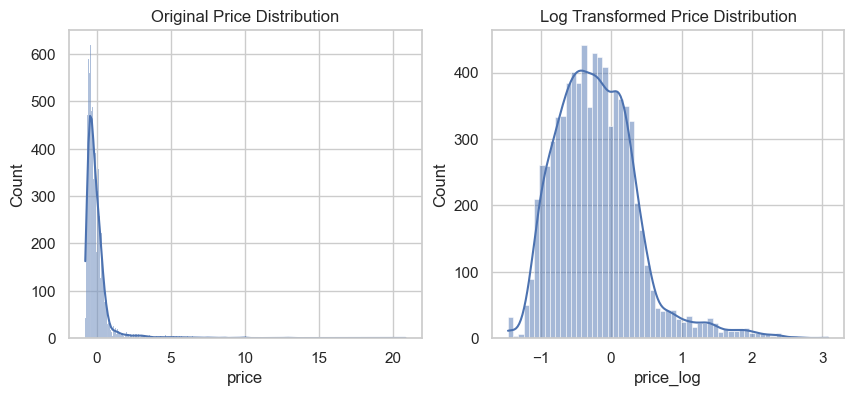

In [130]:
import numpy as np

df['price_log'] = np.log1p(df['price'])
df['kms_driven_log'] = np.log1p(df['kms_driven'])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True)
plt.title("Original Price Distribution")

plt.subplot(1,2,2)
sns.histplot(df['price_log'], kde=True)
plt.title("Log Transformed Price Distribution")
plt.show()


#### - Multivariate Pairplot

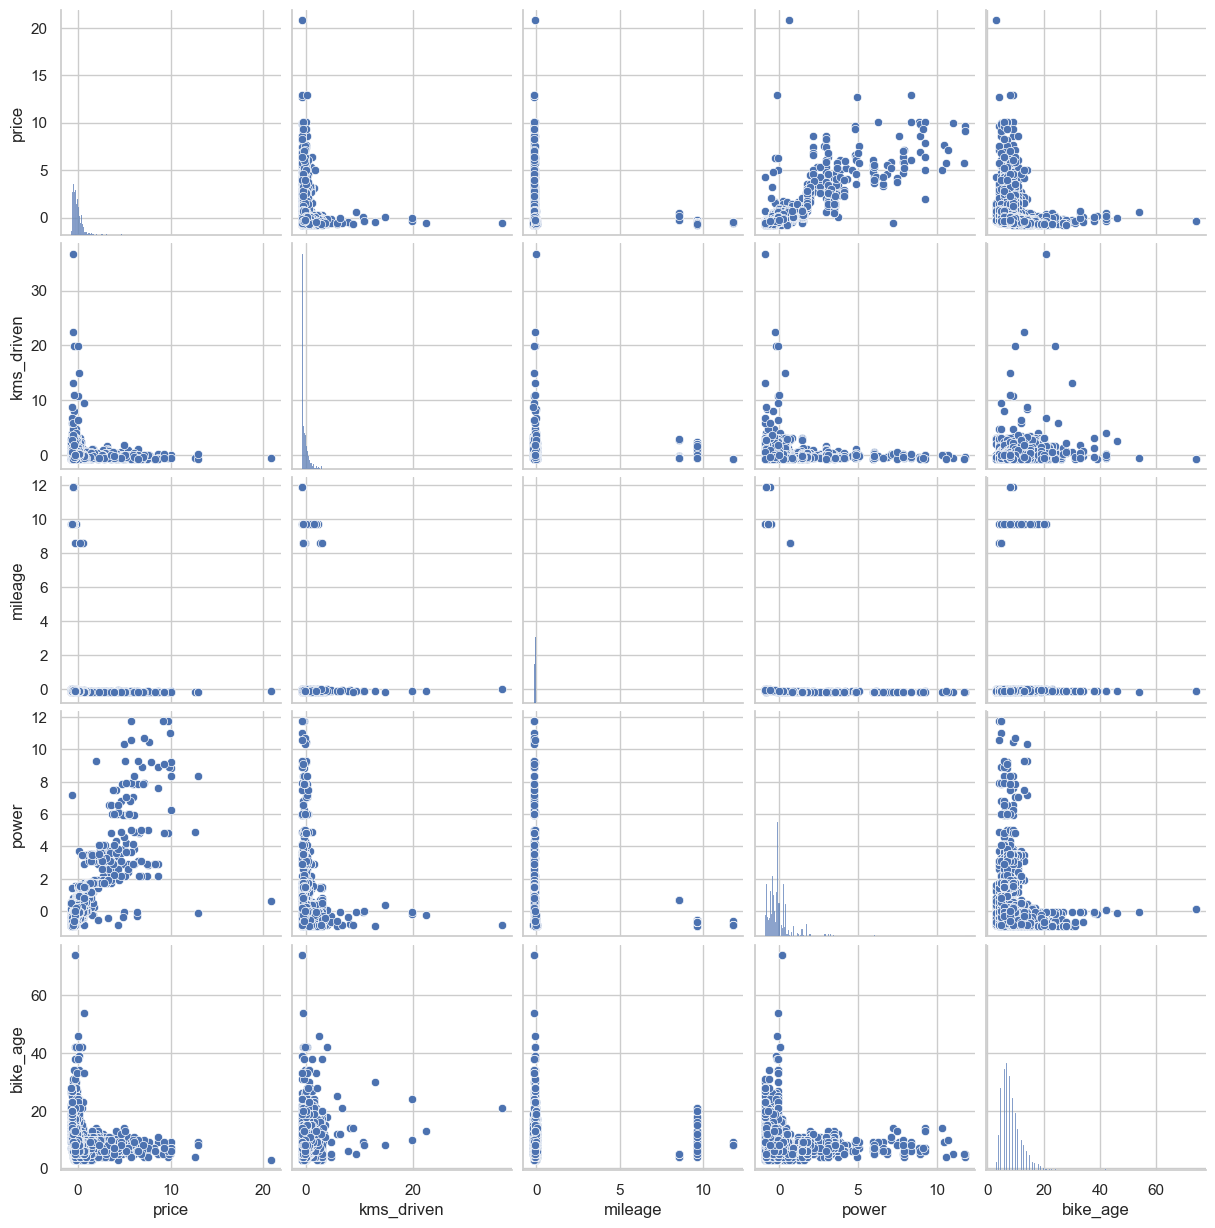

In [131]:
sns.pairplot(df[['price', 'kms_driven', 'mileage', 'power', 'bike_age']])
plt.show()


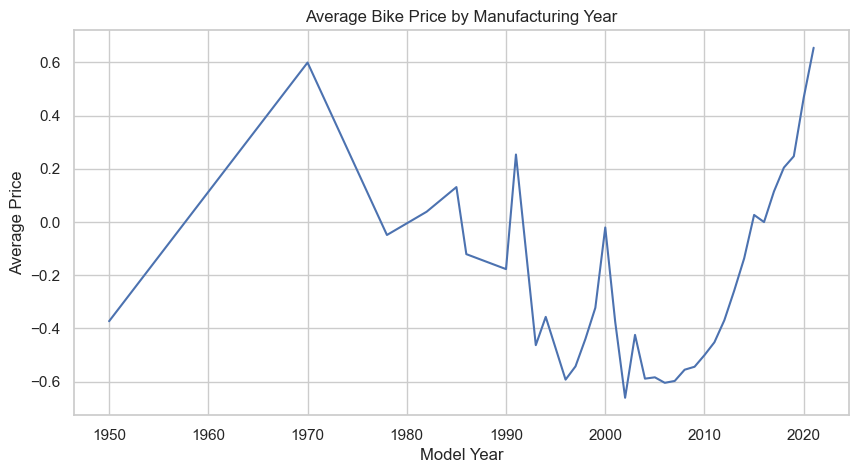

In [132]:
plt.figure(figsize=(10,5))
df.groupby('model_year')['price'].mean().plot()
plt.title("Average Bike Price by Manufacturing Year")
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.show()



In [133]:
df

,model_name,model_year,kms_driven,location,mileage,power,price,cc,bike_age,power_to_cc_ratio,...,brand_Royal,brand_Suzuki,brand_TVS,brand_Triumph,brand_UM,brand_Yamaha,brand_Yazdi,brand_yamaha,price_log,kms_driven_log
0,Bajaj Avenger Cruise 220 2017,2017,-0.009916,hyderabad,-0.122434,-0.125325,-0.311634,-0.347932,7,NaN,...,False,False,False,False,False,False,False,False,-0.373434,-0.009966
1,Royal Enfield Classic 350cc 2016,2016,1.223491,hyderabad,-0.122434,-0.072028,0.059090,1.021930,8,0.056571,...,True,False,False,False,False,False,False,False,0.057410,0.799078
2,Hyosung GT250R 2012,2012,-0.092330,hyderabad,-0.133266,0.474269,1.390818,-0.347932,12,NaN,...,False,False,False,False,False,False,False,False,0.871636,-0.096875
3,Bajaj Dominar 400 ABS 2017,2017,-0.644261,pondicherry,-0.137599,0.907309,-0.048888,-0.347932,7,NaN,...,False,False,False,False,False,False,False,False,-0.050123,-1.033558
4,Jawa Perak 330cc 2020,2020,-0.570556,bangalore,-0.111602,0.607512,0.652969,0.860769,4,0.090909,...,False,False,False,False,False,False,False,False,0.502573,-0.845263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,-0.383676,agra,-0.107269,-0.325190,-0.372821,-0.589673,13,0.106667,...,False,False,False,False,False,True,False,False,-0.466524,-0.483982
7853,Bajaj Discover 100cc 2015,2015,-0.642318,delhi,-0.024943,-0.878149,-0.567182,-0.992573,9,0.077000,...,False,False,False,False,False,False,False,False,-0.837437,-1.028110
7854,Bajaj Pulsar 180cc 2016,2016,-0.405840,bangalore,-0.057440,-0.258568,-0.324303,-0.347932,8,0.094444,...,False,False,False,False,False,False,False,False,-0.392011,-0.520606
7855,Bajaj V15 150cc 2016,2016,-0.364091,bangalore,-0.074772,-0.605001,-0.416013,-0.589673,8,0.078667,...,False,False,False,False,False,False,False,False,-0.537876,-0.452700


In [138]:
df.location.unique()

array(['hyderabad', 'pondicherry', 'bangalore', 'jaipur', 'chennai',
       'ghaziabad', 'delhi', 'ludhiana', 'jaunpur', 'mumbai',
       'chittorgarh', 'thalassery', 'bathinda', 'gurgaon', 'dehradun',
       'pune', 'kukatpally', 'navi mumbai', 'lucknow', 'siliguri',
       'bengaluru', 'rajkot', 'agra', 'bhiwandi', 'patna', 'udaipur',
       'bihar shariff', 'jalandhar', 'vadodara', 'visakhapatnam',
       'thiruvananthapuram', 'ahmedabad', 'bareilly', 'thane', 'kannur',
       'surat', 'kurukshetra', 'moradabad', 'bhagalpur', 'hooghly',
       'jhunjhunu', 'kochi', 'srikakulam', 'jamshedpur', 'hazaribagh',
       'noida', 'chandigarh', 'reasi', 'ambala', 'panchkula', 'balotra',
       'sonipat', 'kolkata', 'jind', 'trivandrum', 'mathura', 'panipat',
       'sangli', 'howrah', 'indore', 'pilibhit', 'nagpur', 'jodhpur',
       'alipore', 'secunderabad', 'patiala', 'dhrangadhra', 'avadi',
       'sri ganganagar', 'pali', 'palampur', 'baleshwar', 'kotputli',
       'panruti', 'samana', 

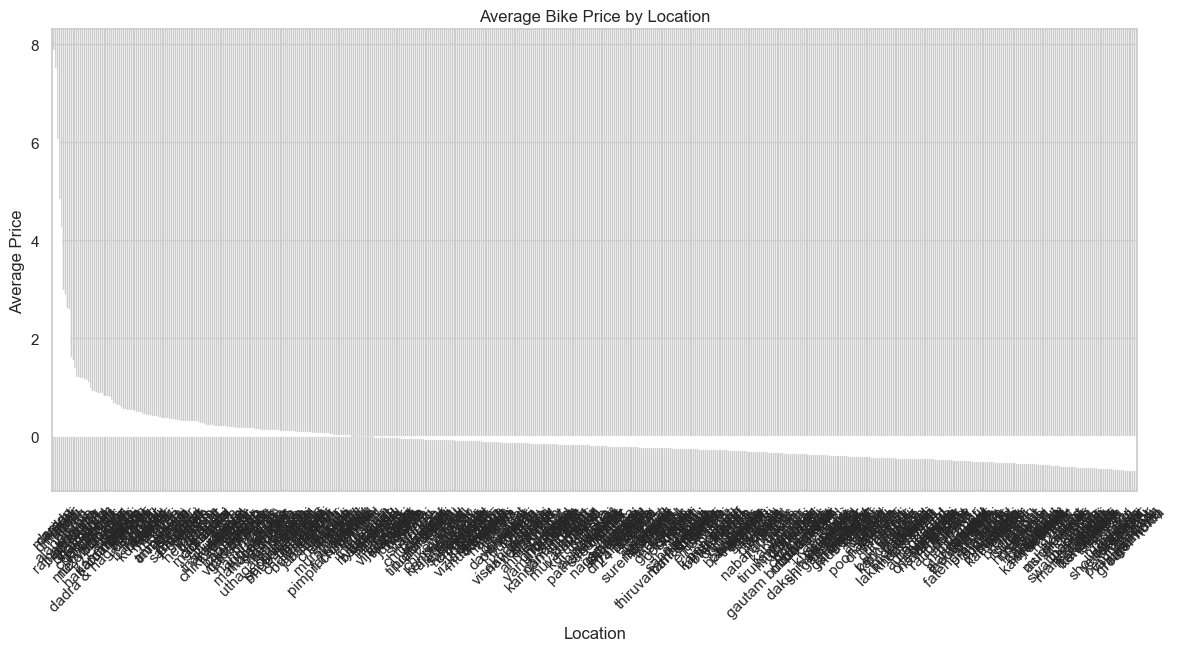

In [136]:
location_price = df.groupby('location')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
location_price.plot(kind='bar')
plt.title("Average Bike Price by Location")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.show()


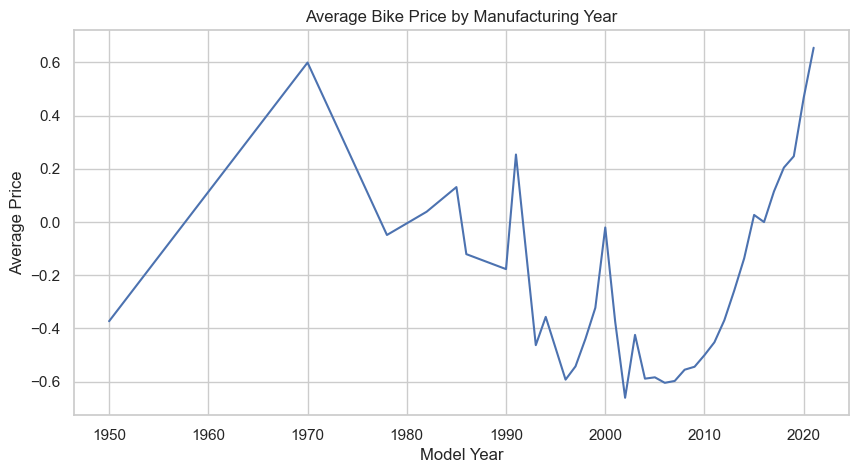

In [75]:
plt.figure(figsize=(10,5))
df.groupby('model_year')['price'].mean().plot()
plt.title("Average Bike Price by Manufacturing Year")
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.show()


In [142]:
df.head()

,model_name,model_year,kms_driven,location,mileage,power,price,cc,bike_age,power_to_cc_ratio,...,brand_Royal,brand_Suzuki,brand_TVS,brand_Triumph,brand_UM,brand_Yamaha,brand_Yazdi,brand_yamaha,price_log,kms_driven_log
0,Bajaj Avenger Cruise 220 2017,2017,-0.009916,hyderabad,-0.122434,-0.125325,-0.311634,-0.347932,7,NaN,...,False,False,False,False,False,False,False,False,-0.373434,-0.009966
1,Royal Enfield Classic 350cc 2016,2016,1.223491,hyderabad,-0.122434,-0.072028,0.059090,1.021930,8,0.056571,...,True,False,False,False,False,False,False,False,0.057410,0.799078
2,Hyosung GT250R 2012,2012,-0.092330,hyderabad,-0.133266,0.474269,1.390818,-0.347932,12,NaN,...,False,False,False,False,False,False,False,False,0.871636,-0.096875
3,Bajaj Dominar 400 ABS 2017,2017,-0.644261,pondicherry,-0.137599,0.907309,-0.048888,-0.347932,7,NaN,...,False,False,False,False,False,False,False,False,-0.050123,-1.033558
4,Jawa Perak 330cc 2020,2020,-0.570556,bangalore,-0.111602,0.607512,0.652969,0.860769,4,0.090909,...,False,False,False,False,False,False,False,False,0.502573,-0.845263


In [149]:
df.model_name

0          Bajaj Avenger Cruise 220 2017
1       Royal Enfield Classic 350cc 2016
2                    Hyosung GT250R 2012
3             Bajaj Dominar 400 ABS 2017
4                  Jawa Perak 330cc 2020
                      ...               
7852           Yamaha YZF-R15 150cc 2011
7853           Bajaj Discover 100cc 2015
7854             Bajaj Pulsar 180cc 2016
7855                Bajaj V15 150cc 2016
7856             Bajaj Pulsar 220cc 2016
Name: model_name, Length: 7857, dtype: object

In [150]:
# Extract model name (without brand, year, cc)
df['model_only'] = df['model_name'].str.replace(r'\d+cc|\d{4}', '', regex=True)
df['model_only'] = df['model_only'].str.strip()


In [151]:
df.head()

,model_name,model_year,kms_driven,location,mileage,power,price,cc,bike_age,power_to_cc_ratio,...,brand_Suzuki,brand_TVS,brand_Triumph,brand_UM,brand_Yamaha,brand_Yazdi,brand_yamaha,price_log,kms_driven_log,model_only
0,Bajaj Avenger Cruise 220 2017,2017,-0.009916,hyderabad,-0.122434,-0.125325,-0.311634,-0.347932,7,NaN,...,False,False,False,False,False,False,False,-0.373434,-0.009966,Bajaj Avenger Cruise 220
1,Royal Enfield Classic 350cc 2016,2016,1.223491,hyderabad,-0.122434,-0.072028,0.059090,1.021930,8,0.056571,...,False,False,False,False,False,False,False,0.057410,0.799078,Royal Enfield Classic
2,Hyosung GT250R 2012,2012,-0.092330,hyderabad,-0.133266,0.474269,1.390818,-0.347932,12,NaN,...,False,False,False,False,False,False,False,0.871636,-0.096875,Hyosung GT250R
3,Bajaj Dominar 400 ABS 2017,2017,-0.644261,pondicherry,-0.137599,0.907309,-0.048888,-0.347932,7,NaN,...,False,False,False,False,False,False,False,-0.050123,-1.033558,Bajaj Dominar 400 ABS
4,Jawa Perak 330cc 2020,2020,-0.570556,bangalore,-0.111602,0.607512,0.652969,0.860769,4,0.090909,...,False,False,False,False,False,False,False,0.502573,-0.845263,Jawa Perak


🧾 Final Conclusions

Bike Age, Max Power, Brand, and Ownership History are the strongest predictors of resale price.

Fuel Type and Seller Type have moderate influence.

Mileage alone is not a strong price driver, but combined with Power and Age, it contributes meaningfully.

Feature engineering significantly improved dataset quality and predictive potential.

Dataset is now clean, structured, and ready for model development (ML/regression).

🚀 Next Recommended Steps



👉 Building a price prediction model (Linear Regression, RandomForest, XGBoost)

👉 Creating a dashboard to visualize brand-wise price analysis

👉 Deploying the bike price prediction as a Streamlit / Flask web app
